<h2 style="color:green;">CaseStudy: Investigating Netflix Movies</h2>

## 1. Data Loading: User Experience Metrics into a dictionary.

<p>Given the large number of movies and series available on the platform, it is a perfect opportunity to flex our data manipulation skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. For their first order of business, they have been performing some analyses, and they believe that the average duration of movies has been declining. </p>
<p>As evidence of this, they have provided us with the following information. For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.</p>

In [31]:
sample_years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
sample_durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

sample_movie_dict = {
 'years': sample_years,
 'durations': sample_durations
}
sample_movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

## 2. Generating a DataFrame from a Dictionary of Lists


In [32]:
import pandas as pd
df_sample_durations = pd.DataFrame(sample_movie_dict)
df_sample_durations

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


## 3. Data Visualization and Inspection


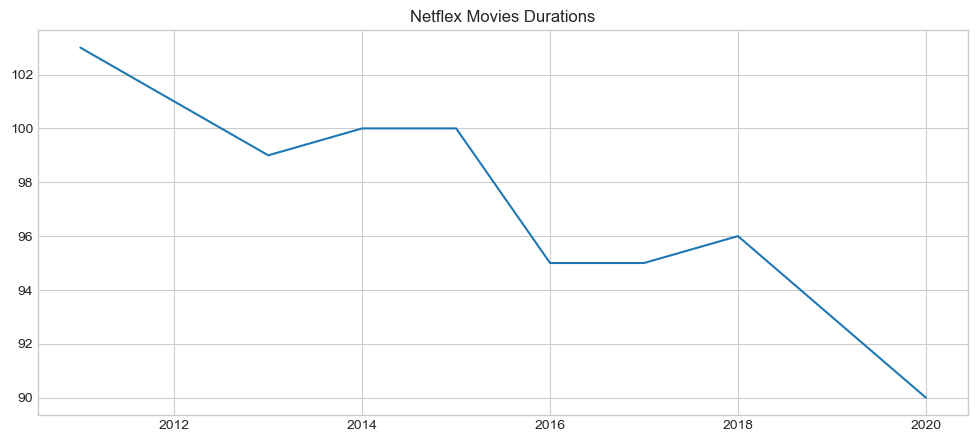

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

plt.plot(df_sample_durations['years'], df_sample_durations['durations'])

plt.title('Netflex Movies Durations')

plt.show()

## 4. Importing the Remaining Data from CSV File

In [9]:
df_netflix = pd.read_csv('./datasets/netflix_data.csv')

df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [10]:
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64

- 11 columns in which 2 columns are numerical rest are categorical
- 4 columns have null values

In [11]:

years = df_netflix.release_year.to_list()
durations = df_netflix.duration.to_list()

movie_dict = {
    'years': years,
    'durations': durations
}

In [15]:

df_durations = pd.DataFrame(movie_dict)

df_durations.head(10)

,years,durations
0,2020,4
1,2016,93
2,2011,78
3,2009,80
4,2008,123
5,2016,1
6,2019,95
7,1997,119
8,2019,118
9,2008,143


## 5. Exploratory Data Visualization

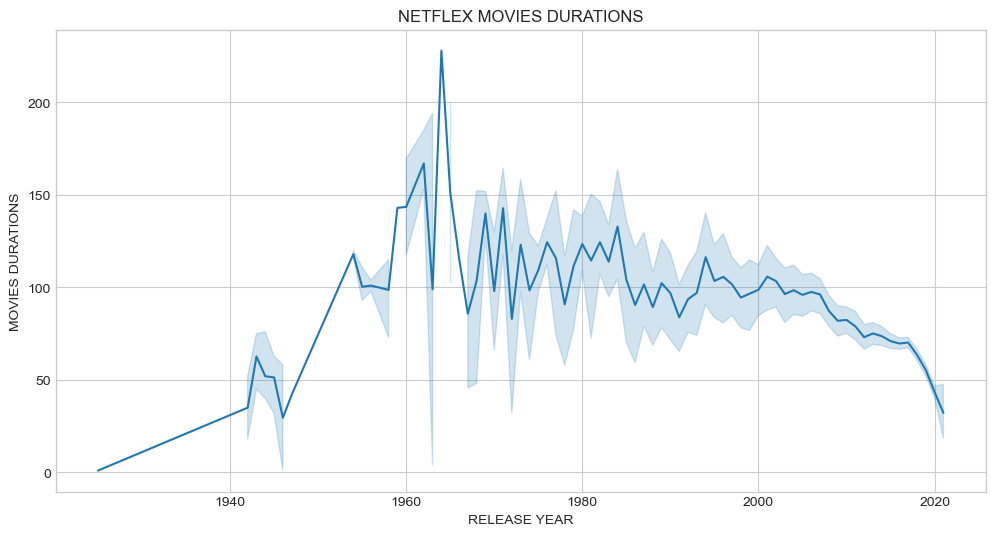

In [18]:

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

sns.lineplot(x='years', y='durations', data=df_durations)

plt.title('NETFLEX MOVIES DURATIONS')

plt.xlabel('RELEASE YEAR')

plt.ylabel('MOVIES DURATIONS')

plt.show()

## 6. Filter Movies by Genre, Rating, and More...

In [25]:

df_netflix_movies = df_netflix[df_netflix['type'] == 'Movie']

netflix_movies_col_subset = df_netflix_movies[['title', 'country', 'genre', 'release_year', 'duration']]

netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


## 7. Creating a Scatter Plot in Data Visualization

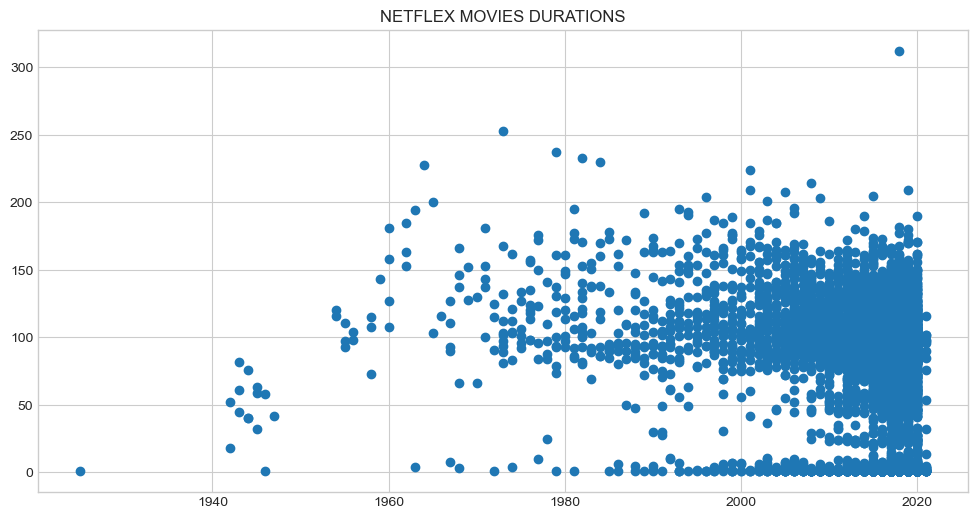

In [26]:

fig = plt.figure(figsize=(12,6))

plt.scatter(x='years', y='durations', data=df_durations)

plt.title('NETFLEX MOVIES DURATIONS')

plt.show()

## 8. Digging Deeper: Insights and Interpretations

In [27]:

short_movies = df_netflix_movies[df_netflix_movies['duration'] < 60]

short_movies.head(7)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
35,s36,Movie,#Rucker50,Robert McCullough Jr.,NaN,United States,"December 1, 2016",2016,56,This documentary celebrates the 50th anniversa...,Documentaries
55,s56,Movie,100 Things to do Before High School,NaN,"Isabela Moner, Jaheem Toombs, Owen Joyner, Jac...",United States,"November 2, 2019",2014,44,"Led by seventh-grader C.J., three students who...",Uncategorized
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,37,Oprah Winfrey sits down with director Ava DuVe...,Uncategorized
101,s102,Movie,3 Seconds Divorce,Shazia Javed,NaN,Canada,"June 15, 2019",2018,53,A Muslim women's activist group in India prote...,Documentaries
146,s147,Movie,A 3 Minute Hug,Everardo González,NaN,Mexico,"October 28, 2019",2019,28,This documentary captures the joy and heartbre...,Documentaries
162,s163,Movie,A Christmas Special: Miraculous: Tales of Lady...,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...",France,"December 20, 2016",2016,22,Parisian teen Marinette transforms herself int...,Uncategorized
171,s172,Movie,A Family Reunion Christmas,Robbie Countryman,"Loretta Devine, Tia Mowry-Hardrict, Anthony Al...",United States,"December 9, 2019",2019,29,M'Dear and her sisters struggle to keep their ...,Uncategorized


## 9. Evaluation Rubric: Marking Non-Feature Films

In [28]:

colors = []

for rows, columns in netflix_movies_col_subset.iterrows() :
    if columns['genre'] == 'Children':
        colors.append('red')
    elif columns['genre'] == 'Stand-Up':
        colors.append('green')
    elif columns['genre'] == 'Documentaries':
        colors.append('blue')
    else:
        colors.append('black')

colors[:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

## 10. Plotting with Color! - Making Data Come Alive

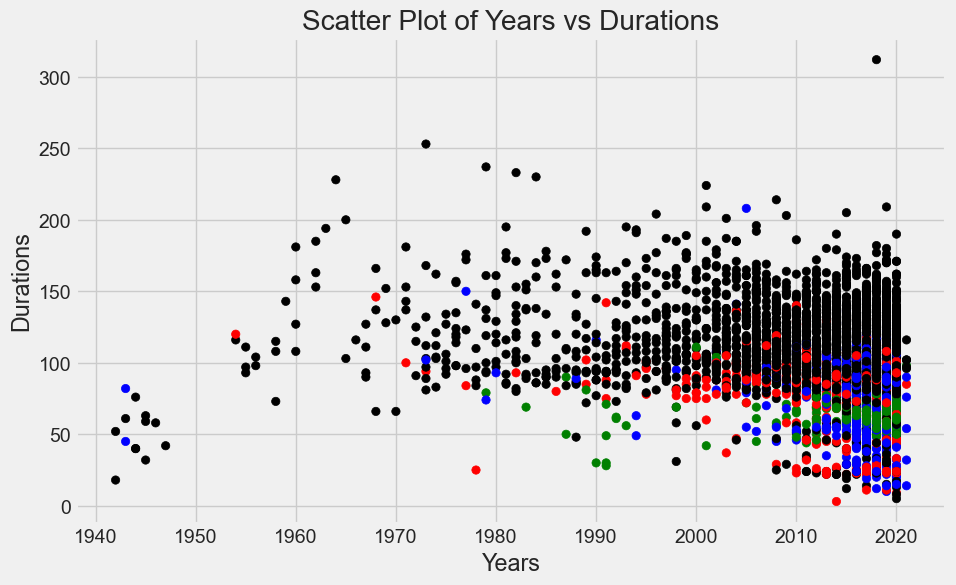

In [38]:

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
                 
plt.scatter(x='release_year', y='duration', data=df_netflix_movies, c=colors)

plt.title('Scatter Plot of Years vs Durations')
plt.xlabel('Years')
plt.ylabel('Durations')

plt.show()